In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

In [2]:
path="/lustre/ytzheng/"
# path = "C:/data/SAM_cases/"

Casename = 'ASTEX_cold2.6'
Casename1 = 'ASTEX_warm2.6'

f = xr.open_mfdataset(path + Casename + '/' +  '*N100.nc',
                      combine = 'by_coords',decode_cf = False)
f1 = xr.open_mfdataset(path + Casename1 + '/' + '*N100.nc',
                      combine = 'by_coords',decode_cf = False)

f = f.isel(time = 30)
f1 = f1.isel(time = 30)

In [3]:
# path3D = "C:/data/SAM_cases/"
path3D = "/lustre/ytzheng/"

f_3D = xr.open_dataset(path3D + Casename + '/' +  
                       'ASTEX_cold2.6_120x120x512_35m_DRZ_RRTM_N100_120_0000036600.nc') 

f1_3D = xr.open_dataset(path3D + Casename1 + '/' +  
                        'ASTEX_warm2.6_120x120x512_35m_DRZ_RRTM_N100_120_0000036600.nc')  

f_3D = f_3D.isel(time=0).assign_coords(z=f.z.values)
f1_3D = f1_3D.isel(time=0).assign_coords(z=f.z.values)

In [4]:
Lv     = 2.5104e6          # Latent heat of condensation, J/kg
myfontsize = 12
z = f['z']/f['ZINV']/1000.
z1 = f1['z']/f1['ZINV']/1000.

In [5]:
def cal_flux(w, var):
    wvar = ((var - var.mean(dim = ('x', 'y')))*(
        w - w.mean(dim = ('x', 'y')))).mean(dim = ('x', 'y'))

    wvar_up = ((var.where(w>0) - var.mean(dim = ('x', 'y')))*(
        w.where(w>0) - w.mean(dim = ('x', 'y')))).mean(dim = ('x', 'y'))

    wvar_dn = ((var.where(w<0) - var.mean(dim = ('x', 'y')))*(
        w.where(w<0) - w.mean(dim = ('x', 'y')))).mean(dim = ('x', 'y'))
    
    return wvar,wvar_up,wvar_dn

In [10]:
def setax(ax, zcb, lcl, ytitle = '', xtitle = '', color = 'black'):
    ax.axhline(y=zcb, linestyle='--',color = color)  
    ax.axhline(y=lcl, linestyle='--',color = 'grey')
    ax.set_ylabel(ytitle, fontsize=myfontsize) 
    ax.set_xlabel(xtitle, fontsize=myfontsize) 
    ax.set_ylim([0., 1.0])
    ax.grid(True)

In [7]:
BOLTZMAN  = 1.380658e-23 #                 Boltzman constant (J/K)
AVOGADRO  = .602214199e24 #                 Avogadro constant (1/mol)
MD        = 28.9644e-3 #                    molar mass dry air (kg/mol)
MV        = 18.0153e-3 #                    molae mass water vapor (kg/mol)
r_v       = (AVOGADRO)*(BOLTZMAN)/(MV) #    gas constant for water vapor (J/(kg-K))
r_d       = (AVOGADRO)*(BOLTZMAN)/(MD) #    gas constant for dry air (J/(kg-K))
cp        = 7./2*(r_d) #                   specific heat of air (J/(kg-K))
L        = 2.5008e6
g = 0.981
p_ref = 1000. #   reference  pressure, hPa

ww,ww_up,ww_dn = cal_flux(f_3D['W'], 
                      f_3D['W'])

ww1,ww1_up,ww1_dn = cal_flux(f1_3D['W'], 
                      f1_3D['W'])

wqt,wqt_up,wqt_dn = cal_flux(f_3D['W'], 
                      f_3D['QN'] + f_3D['QV'])

wqt1,wqt1_up,wqt1_dn = cal_flux(f1_3D['W'], 
                      f1_3D['QN'] + f1_3D['QV'])

whl,whl_up,whl_dn = cal_flux(f_3D['W'], 
                      f_3D['TABS'] + (g/cp)*f_3D['z'] - (L/cp)*f_3D['QN']/1000.)

whl1,whl1_up,whl1_dn = cal_flux(f1_3D['W'], 
                      f1_3D['TABS'] + (g/cp)*f1_3D['z'] - (L/cp)*f1_3D['QN']/1000.)

wthv,wthv_up,wthv_dn = cal_flux(f_3D['W'], 
                      (f_3D['TABS']*((p_ref/f['p'])**(r_d/cp)))*(1 + 0.61*f_3D['QV']/1000.))

wthv1,wthv1_up,wthv1_dn = cal_flux(f1_3D['W'], 
                      (f1_3D['TABS']*((p_ref/f1['p'])**(r_d/cp)))*(1 + 0.61*f1_3D['QV']/1000.))

wp,wp_up,wp_dn = cal_flux(f_3D['W'], 
                      f_3D['PP'])

wp1,wp1_up,wp1_dn = cal_flux(f1_3D['W'], 
                      f1_3D['PP'])

/software/spack-software/2020.05.14/linux-rhel8-ivybridge/gcc-8.4.0/python-3.7.7-zgcjuclie3fiis4ljkrfp4c4j6fkoa62/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/software/spack-software/2020.05.14/linux-rhel8-ivybridge/gcc-8.4.0/python-3.7.7-zgcjuclie3fiis4ljkrfp4c4j6fkoa62/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


In [12]:
f1

<xarray.Dataset>
Dimensions:               (z: 512)
Coordinates:
  * z                     (z) float32 10.5 22.5 37.5 ... 4055.5 4182.2 4320.9
    time                  float32 166.27083
Data variables:
    p                     (z) float32 dask.array<chunksize=(512,), meta=np.ndarray>
    SST                   float32 dask.array<chunksize=(), meta=np.ndarray>
    Ps                    float32 dask.array<chunksize=(), meta=np.ndarray>
    CLDSHD                float32 dask.array<chunksize=(), meta=np.ndarray>
    AREAPREC              float32 dask.array<chunksize=(), meta=np.ndarray>
    CLD245                float32 dask.array<chunksize=(), meta=np.ndarray>
    WMAX                  float32 dask.array<chunksize=(), meta=np.ndarray>
    UMAX                  float32 dask.array<chunksize=(), meta=np.ndarray>
    PREC                  float32 dask.array<chunksize=(), meta=np.ndarray>
    LHF                   float32 dask.array<chunksize=(), meta=np.ndarray>
    SHF                   flo

/homes/ytzheng/.mypython/lib/python/dask-2020.12.0+21.g4a7a2438-py3.7.egg/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/homes/ytzheng/.mypython/lib/python/dask-2020.12.0+21.g4a7a2438-py3.7.egg/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/homes/ytzheng/.mypython/lib/python/dask-2020.12.0+21.g4a7a2438-py3.7.egg/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/homes/ytzheng/.mypython/lib/python/dask-2020.12.0+21.g4a7a2438-py3.7.egg/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


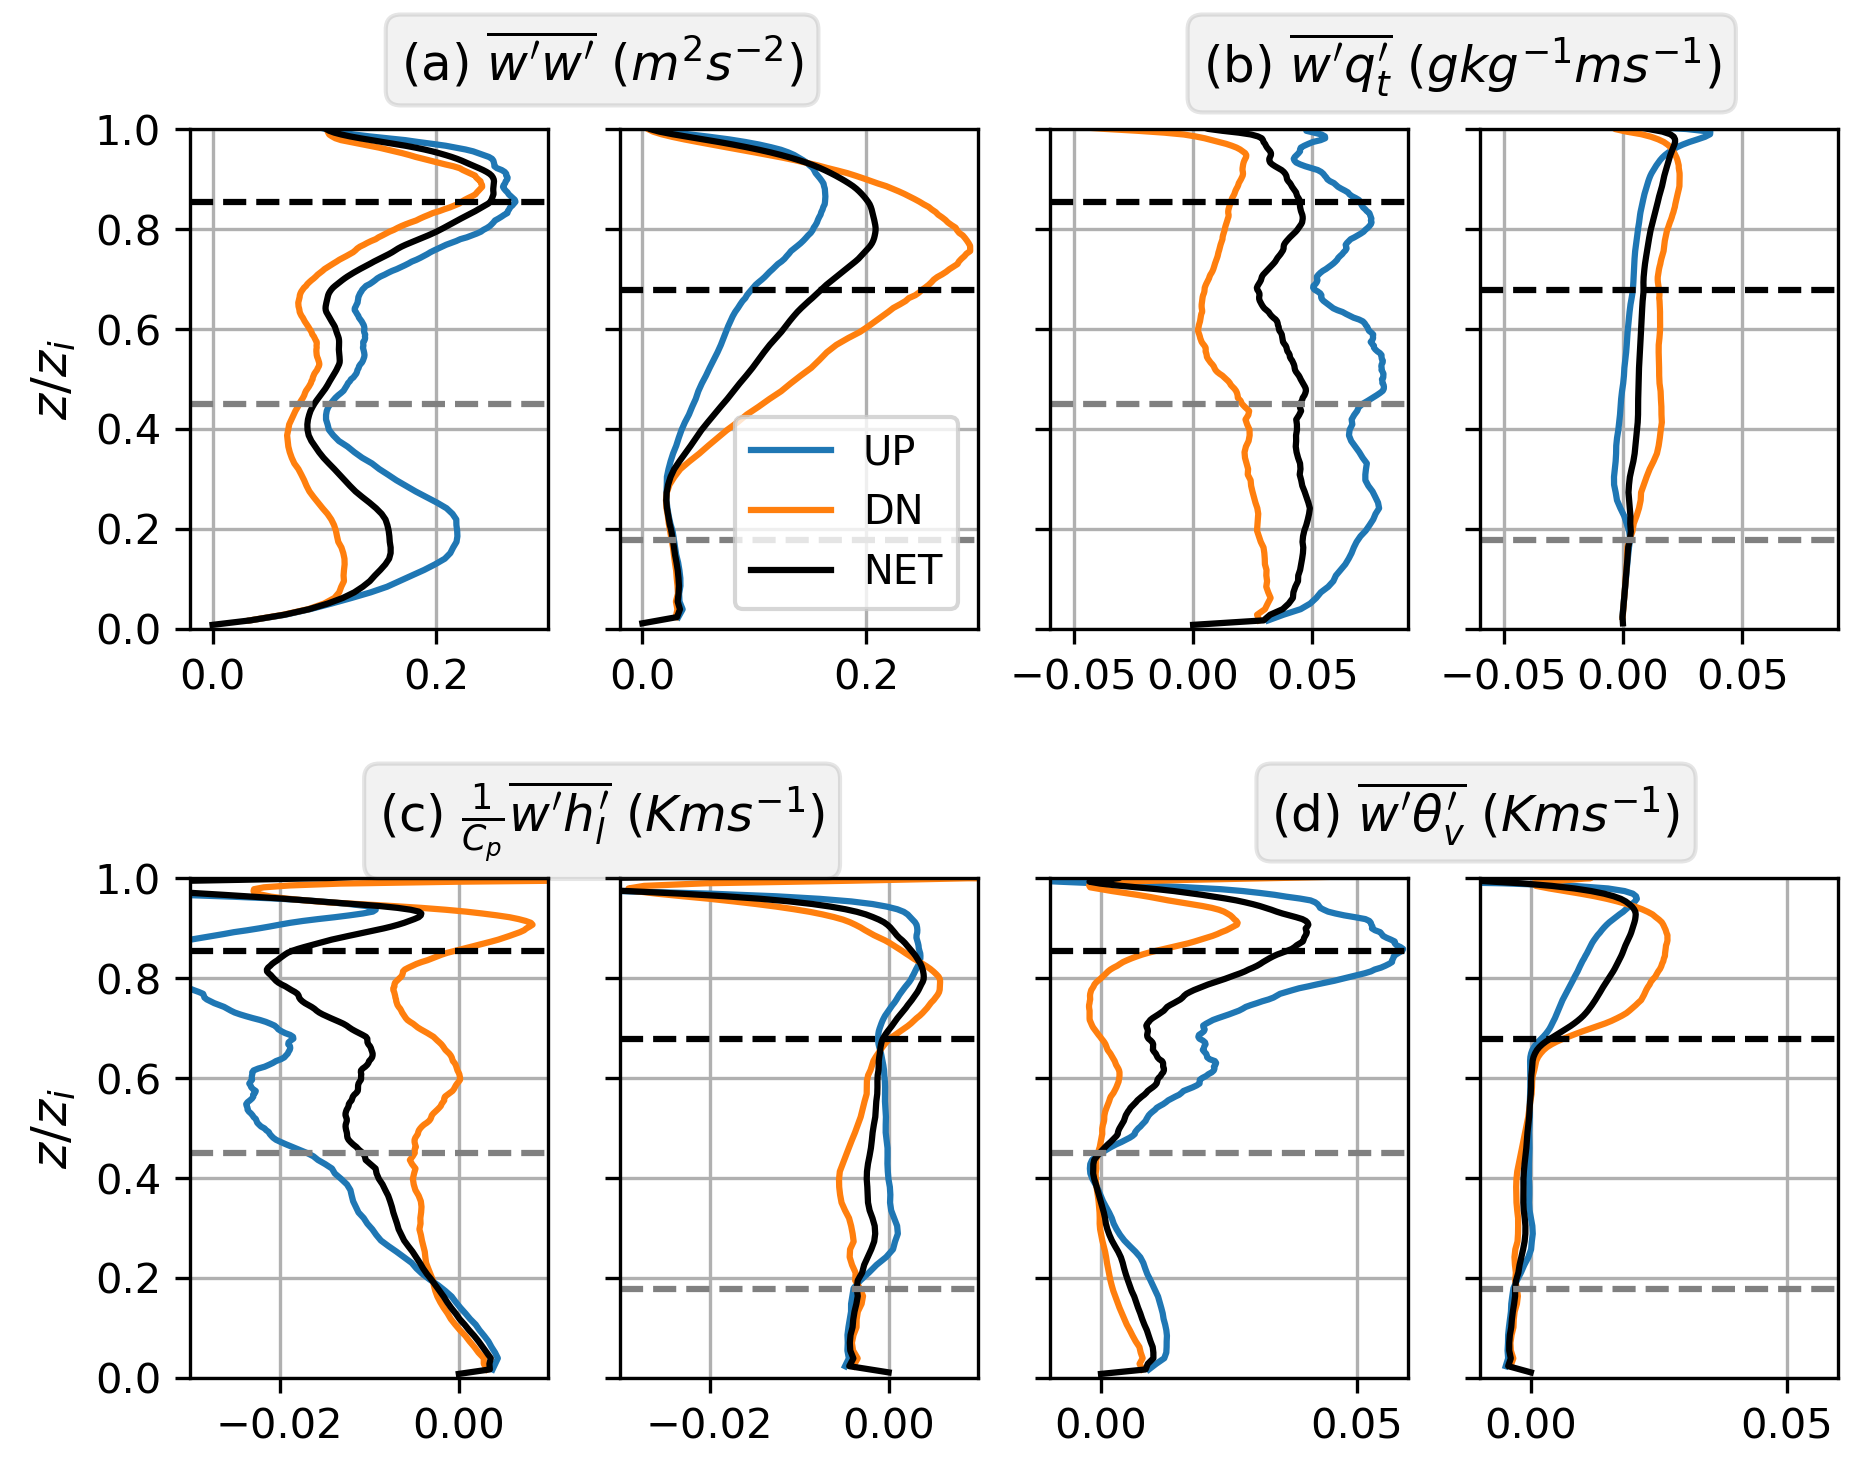

In [15]:
fig, axs = plt.subplots(ncols = 4,
                        nrows = 2,
                        sharex = False, sharey = True,
                        figsize=(18/2.54, (14)/2.54), dpi = 300)

fig.subplots_adjust(hspace=.5)

#
axs[0, 0].plot(ww_up, z, label = 'UP')
axs[0, 0].plot(ww_dn, z, label = 'DN')
axs[0, 0].plot(ww, z, label = 'NET', color = 'black')

axs[0, 1].plot(ww1_up, z1, label = 'UP')
axs[0, 1].plot(ww1_dn, z1, label = 'DN')
axs[0, 1].plot(ww1, z1, label = 'NET', color = 'black')

setax(axs[0,0], f["zcb"]/f["ZINV"]/1000., f["lcl_out"]/f["ZINV"], ytitle = '$z/z_i$')

setax(axs[0,1], f1["zcb"]/f1["ZINV"]/1000., f1["lcl_out"]/f1["ZINV"])

axs[0, 0].set_xlim([-0.02, 0.3])
axs[0, 1].set_xlim([-0.02, 0.3])

axs[0, 1].legend(loc="best", fontsize=0.8*myfontsize)

#
axs[0, 2].plot(wqt_up, z, label = 'UP')
axs[0, 2].plot(wqt_dn, z, label = 'DN')
axs[0, 2].plot(wqt, z, label = 'NET', color = 'black')

axs[0, 3].plot(wqt1_up, z1, label = 'UP')
axs[0, 3].plot(wqt1_dn, z1, label = 'DN')
axs[0, 3].plot(wqt1, z1, label = 'NET', color = 'black')

setax(axs[0,2], f["zcb"]/f["ZINV"]/1000., f["lcl_out"]/f["ZINV"])

setax(axs[0,3], f1["zcb"]/f1["ZINV"]/1000., f1["lcl_out"]/f1["ZINV"])

axs[0, 2].set_xlim([-0.06, 0.09])
axs[0, 3].set_xlim([-0.06, 0.09])

#
axs[1, 0].plot(whl_up, z, label = 'UP')
axs[1, 0].plot(whl_dn, z, label = 'DN')
axs[1, 0].plot(whl, z, label = 'NET', color = 'black')

axs[1, 1].plot(whl1_up, z1, label = 'UP')
axs[1, 1].plot(whl1_dn, z1, label = 'DN')
axs[1, 1].plot(whl1, z1, label = 'NET', color = 'black')

setax(axs[1,0], f["zcb"]/f["ZINV"]/1000., f["lcl_out"]/f["ZINV"], ytitle = '$z/z_i$')

setax(axs[1,1], f1["zcb"]/f1["ZINV"]/1000., f1["lcl_out"]/f1["ZINV"])

axs[1, 0].set_xlim([-0.03, 0.01])
axs[1, 1].set_xlim([-0.03, 0.01])


#
axs[1, 2].plot(wthv_up, z, label = 'UP')
axs[1, 2].plot(wthv_dn, z, label = 'DN')
axs[1, 2].plot(wthv, z, label = 'NET', color = 'black')

axs[1, 3].plot(wthv1_up, z1, label = 'UP')
axs[1, 3].plot(wthv1_dn, z1, label = 'DN')
axs[1, 3].plot(wthv1, z1, label = 'NET', color = 'black')

setax(axs[1,2], f["zcb"]/f["ZINV"]/1000., f["lcl_out"]/f["ZINV"])

setax(axs[1,3], f1["zcb"]/f1["ZINV"]/1000., f1["lcl_out"]/f1["ZINV"])

axs[1, 2].set_xlim([-0.01, 0.06])
axs[1, 3].set_xlim([-0.01, 0.06])


##titles

# place a text box in upper left in axes coords
axs[0,1].text(-0.05, 1.2, r'(a) $\overline{w^{\prime}w^{\prime}} \ (m^2s^{-2})$',
              fontsize=myfontsize,transform=axs[0,1].transAxes, 
              horizontalalignment='center', verticalalignment='top', 
              bbox=dict(boxstyle='round', facecolor='grey', alpha=0.1))

axs[0,3].text(-0.05, 1.2, r'(b) $\overline{w^{\prime}q_t^{\prime}} \ (gkg^{-1} ms^{-1})$',
              fontsize=myfontsize,transform=axs[0,3].transAxes, 
              horizontalalignment='center', verticalalignment='top', 
              bbox=dict(boxstyle='round', facecolor='grey', alpha=0.1))

axs[1,1].text(-0.05, 1.2, r'(c) $\frac{1}{C_p}\overline{w^{\prime}h_l^{\prime}} \ (K ms^{-1})$',
              fontsize=myfontsize,transform=axs[1,1].transAxes, 
              horizontalalignment='center', verticalalignment='top', 
              bbox=dict(boxstyle='round', facecolor='grey', alpha=0.1))

axs[1,3].text(-0.01, 1.2, r'(d) $\overline{w^{\prime}\theta_v^{\prime}} \ (K ms^{-1})$',
              fontsize=myfontsize,transform=axs[1,3].transAxes, 
              horizontalalignment='center', verticalalignment='top', 
              bbox=dict(boxstyle='round', facecolor='grey', alpha=0.1))

fig.savefig('plot_result_flux_dn_up.png', dpi=fig.dpi, bbox_inches='tight')

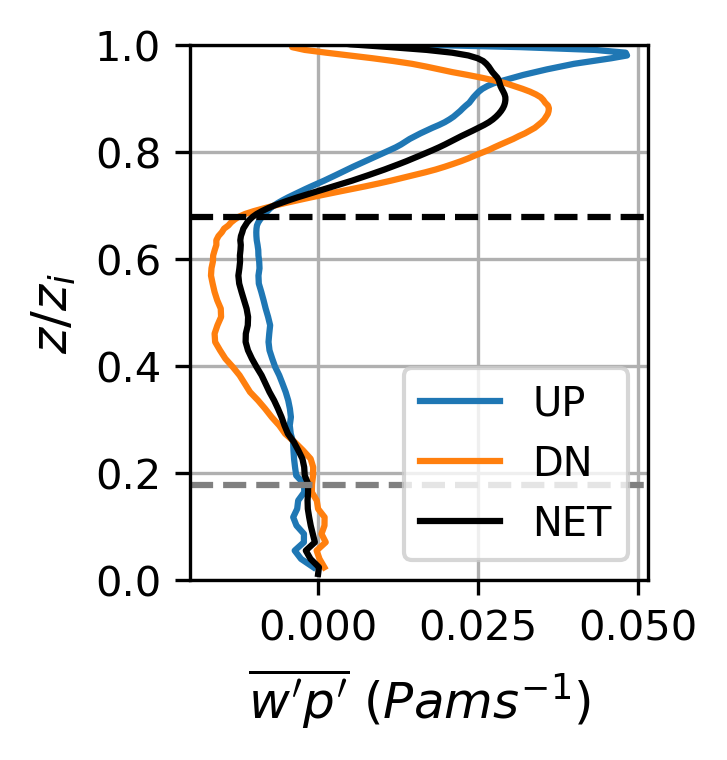

In [16]:
fig, ax = plt.subplots(figsize=(5/2.54, (6)/2.54), dpi = 300)

#
ax.plot(wp1_up, z1, label = 'UP')
ax.plot(wp1_dn, z1, label = 'DN')
ax.plot(wp1, z1, label = 'NET', color = 'black')

setax(ax, f1["zcb"]/f1["ZINV"]/1000., f1["lcl_out"]/f1["ZINV"],
      xtitle = r'$\overline{w^{\prime}p^{\prime}} \ (Pa ms^{-1})$', ytitle = '$z/z_i$')

ax.legend(loc="best", fontsize=0.8*myfontsize)

fig.savefig('plot_result_wp_up_vs_dn_t=30h.png', dpi=fig.dpi, bbox_inches='tight')

In [15]:
BOLTZMAN  = 1.380658e-23 #                 Boltzman constant (J/K)
AVOGADRO  = .602214199e24 #                 Avogadro constant (1/mol)
MD        = 28.9644e-3 #                    molar mass dry air (kg/mol)
MV        = 18.0153e-3 #                    molae mass water vapor (kg/mol)
r_v       = (AVOGADRO)*(BOLTZMAN)/(MV) #    gas constant for water vapor (J/(kg-K))
r_d       = (AVOGADRO)*(BOLTZMAN)/(MD) #    gas constant for dry air (J/(kg-K))
cp        = 7./2*(r_d) #                   specific heat of air (J/(kg-K))
L        = 2.5008e6
rho_ref       = 1.
p_ref = 1000. #   reference  pressure, hPa

pott = f_3D['TABS']*((p_ref/f['p'])**(r_d/cp))
thl = pott - (pott/f_3D['TABS'])*(L/cp)*f_3D['QN']/1000.
w = f_3D['W']
wthl = ((thl - thl.mean(dim = ('x', 'y')))*(w - w.mean(dim = ('x', 'y')))).mean(dim = ('x', 'y'))

thl_up = thl.where(w > 0) 
w_up = w.where(w > 0) 
wthl_up = ((thl_up - thl.mean(dim = ('x', 'y')))*(w_up - w.mean(dim = ('x', 'y')))).mean(dim = ('x', 'y'))

thl_dn = thl.where(w < 0) 
w_dn = w.where(w < 0) 
wthl_dn = ((thl_dn - thl.mean(dim = ('x', 'y')))*(w_dn - w.mean(dim = ('x', 'y')))).mean(dim = ('x', 'y'))

#
pott = f1_3D['TABS']*((p_ref/f1['p'])**(r_d/cp))
thl = pott - (pott/f1_3D['TABS'])*(L/cp)*f1_3D['QN']/1000.
w = f1_3D['W']
wthl1 = ((thl - thl.mean(dim = ('x', 'y')))*(w - w.mean(dim = ('x', 'y')))).mean(dim = ('x', 'y'))

thl_up = thl.where(w > 0) 
w_up = w.where(w > 0) 
wthl1_up = ((thl_up - thl.mean(dim = ('x', 'y')))*(w_up - w.mean(dim = ('x', 'y')))).mean(dim = ('x', 'y'))

thl_dn = thl.where(w < 0) 
w_dn = w.where(w < 0) 
wthl1_dn = ((thl_dn - thl.mean(dim = ('x', 'y')))*(w_dn - w.mean(dim = ('x', 'y')))).mean(dim = ('x', 'y'))

/homes/ytzheng/.mypython/lib/python/dask-2020.12.0+21.g4a7a2438-py3.7.egg/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/homes/ytzheng/.mypython/lib/python/dask-2020.12.0+21.g4a7a2438-py3.7.egg/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/homes/ytzheng/.mypython/lib/python/dask-2020.12.0+21.g4a7a2438-py3.7.egg/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/homes/ytzheng/.mypython/lib/python/dask-2020.12.0+21.g4a7a2438-py3.7.egg/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


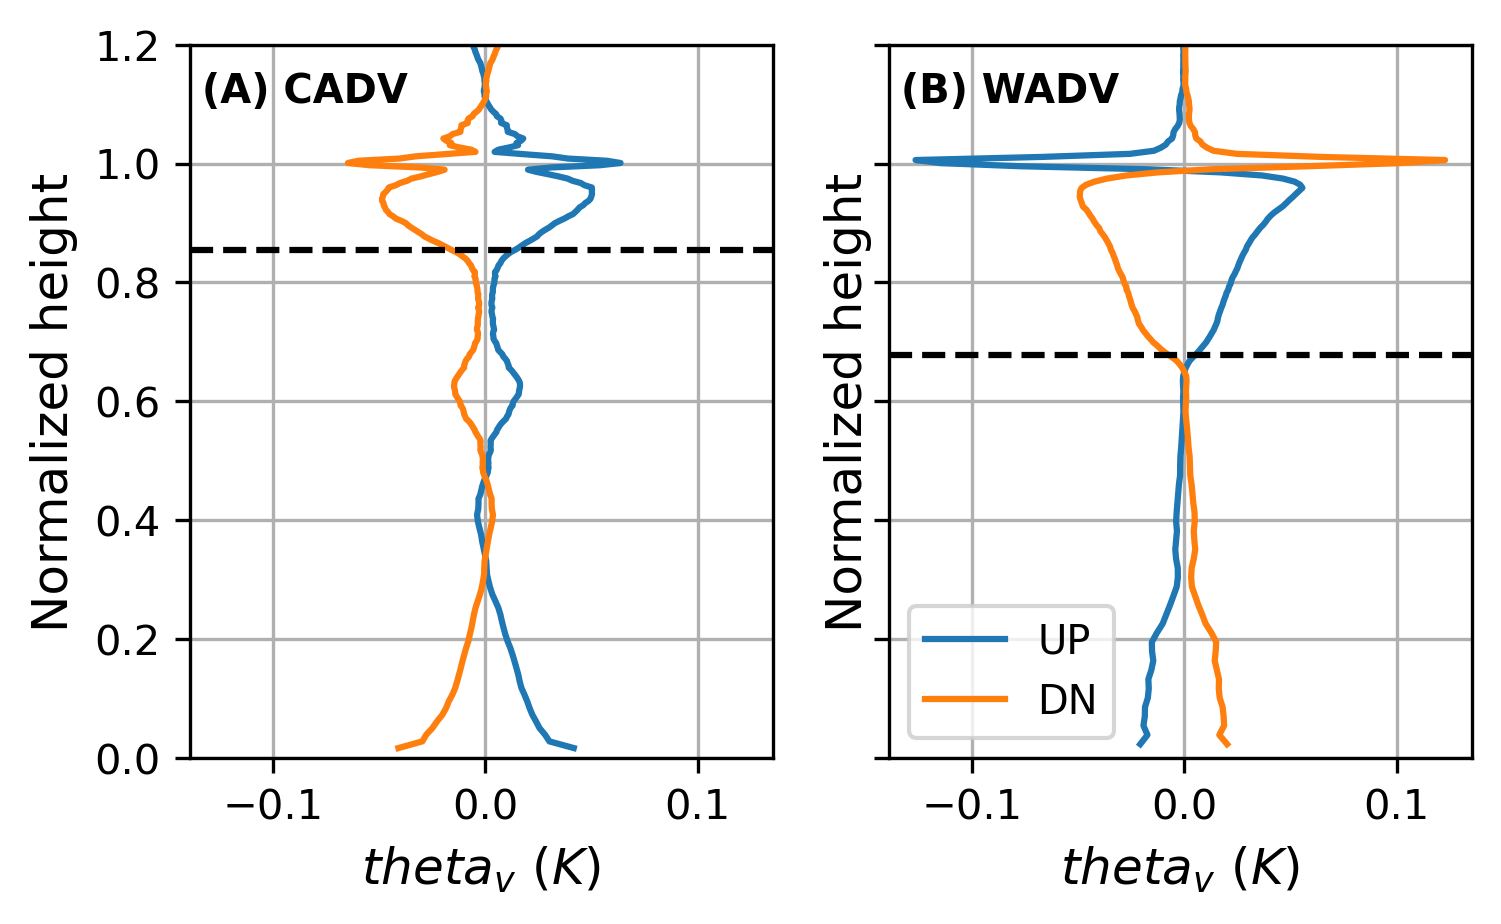

In [39]:
fig, axs = plt.subplots(ncols = 2,
                        nrows = 1,
                        sharex = True, sharey = True,
                        figsize=(14/2.54, (8)/2.54), dpi = 300)
#
axs[0].plot(thv_mean_up - thv_mean, z, label = 'UP')
axs[0].plot(thv_mean_dn - thv_mean, z, label = 'DN')
# axs[0].plot(thv_mean, z, label = 'NET', color = 'black')

setax(axs[0], f["zcb"]/f["ZINV"]/1000.,
      xtitle = r'$theta_v \ (K)$')
# axs[0].set_xlim([-0.06, 0.06])

#
axs[1].plot(thv1_mean_up - thv1_mean, z1, label = 'UP')
axs[1].plot(thv1_mean_dn - thv1_mean, z1, label = 'DN')
# axs[1].plot(thv1_mean, z1, label = 'NET', color = 'black')
# axs[1].set_xlim([289.8, 290.5])

setax(axs[1], f1["zcb"]/f1["ZINV"]/1000.,
      xtitle = r'$theta_v \ (K)$')

axs[1].legend(loc="best", fontsize=0.8*myfontsize)

for i, label in enumerate(('(A) CADV', '(B) WADV')):
    axs[i].text(0.02, 0.92, label, transform=axs[i].transAxes,fontsize=0.8*myfontsize, fontweight='bold')

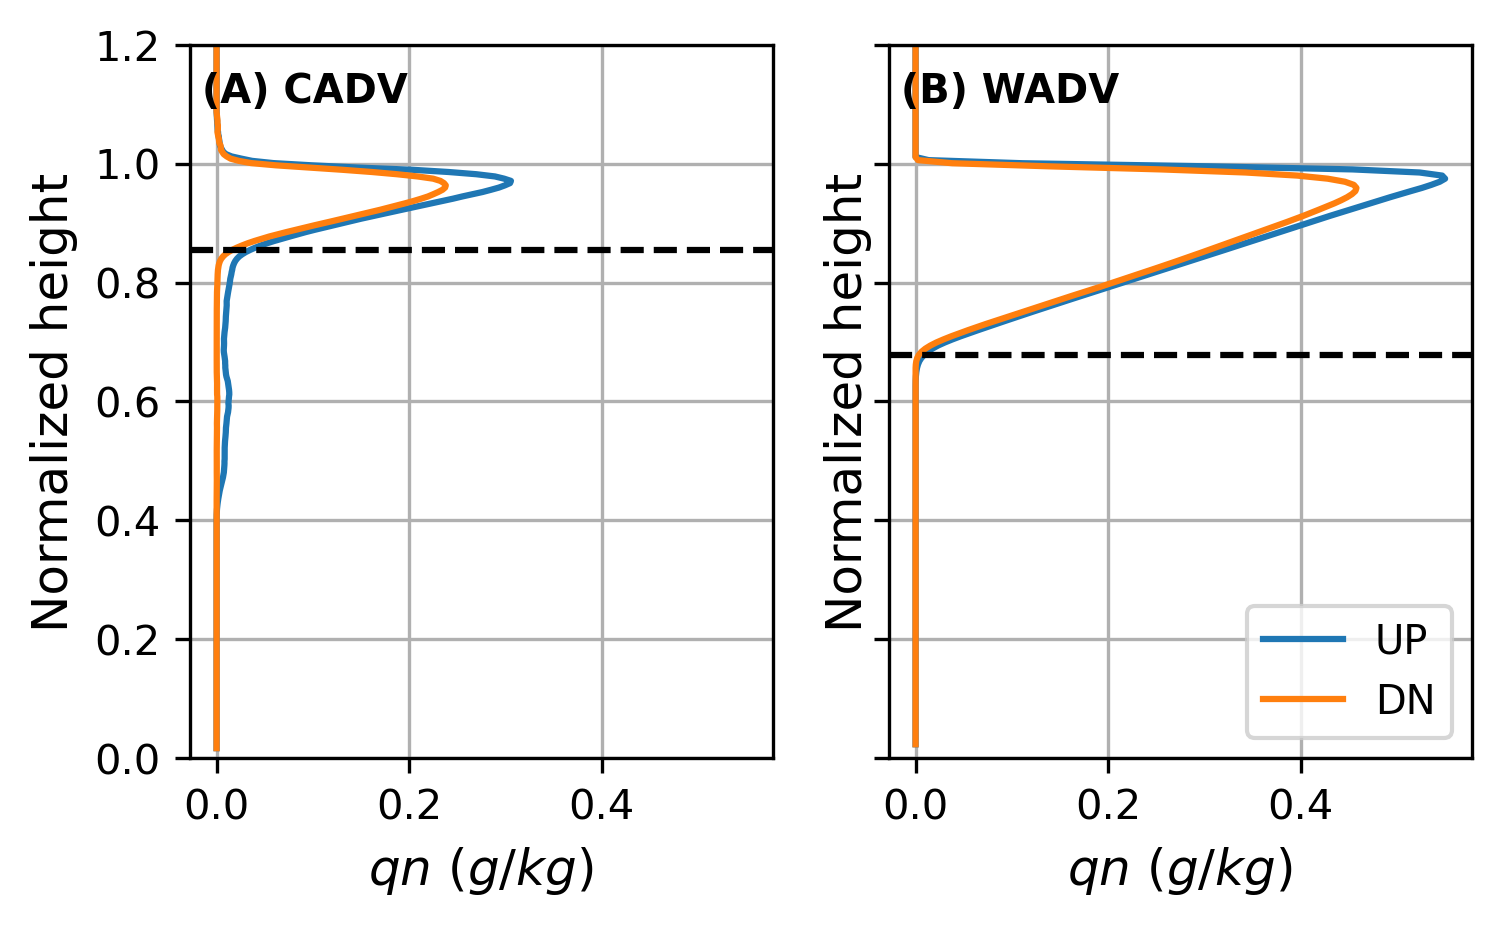

In [18]:
fig, axs = plt.subplots(ncols = 2,
                        nrows = 1,
                        sharex = True, sharey = True,
                        figsize=(14/2.54, (8)/2.54), dpi = 300)
#
axs[0].plot(qn_mean_up, z, label = 'UP')
axs[0].plot(qn_mean_dn, z, label = 'DN')
# axs[0].plot(thv_mean, z, label = 'NET', color = 'black')

setax(axs[0], f["zcb"]/f["ZINV"]/1000.,
      xtitle = r'$qn \ (g/kg)$')
# axs[0].set_xlim([-0.06, 0.06])

#
axs[1].plot(qn1_mean_up, z1, label = 'UP')
axs[1].plot(qn1_mean_dn, z1, label = 'DN')
# axs[1].plot(thv1_mean, z1, label = 'NET', color = 'black')
# axs[1].set_xlim([289.8, 290.5])

setax(axs[1], f1["zcb"]/f1["ZINV"]/1000.,
      xtitle = r'$qn \ (g/kg)$')

axs[1].legend(loc="best", fontsize=0.8*myfontsize)

for i, label in enumerate(('(A) CADV', '(B) WADV')):
    axs[i].text(0.02, 0.92, label, transform=axs[i].transAxes,fontsize=0.8*myfontsize, fontweight='bold')

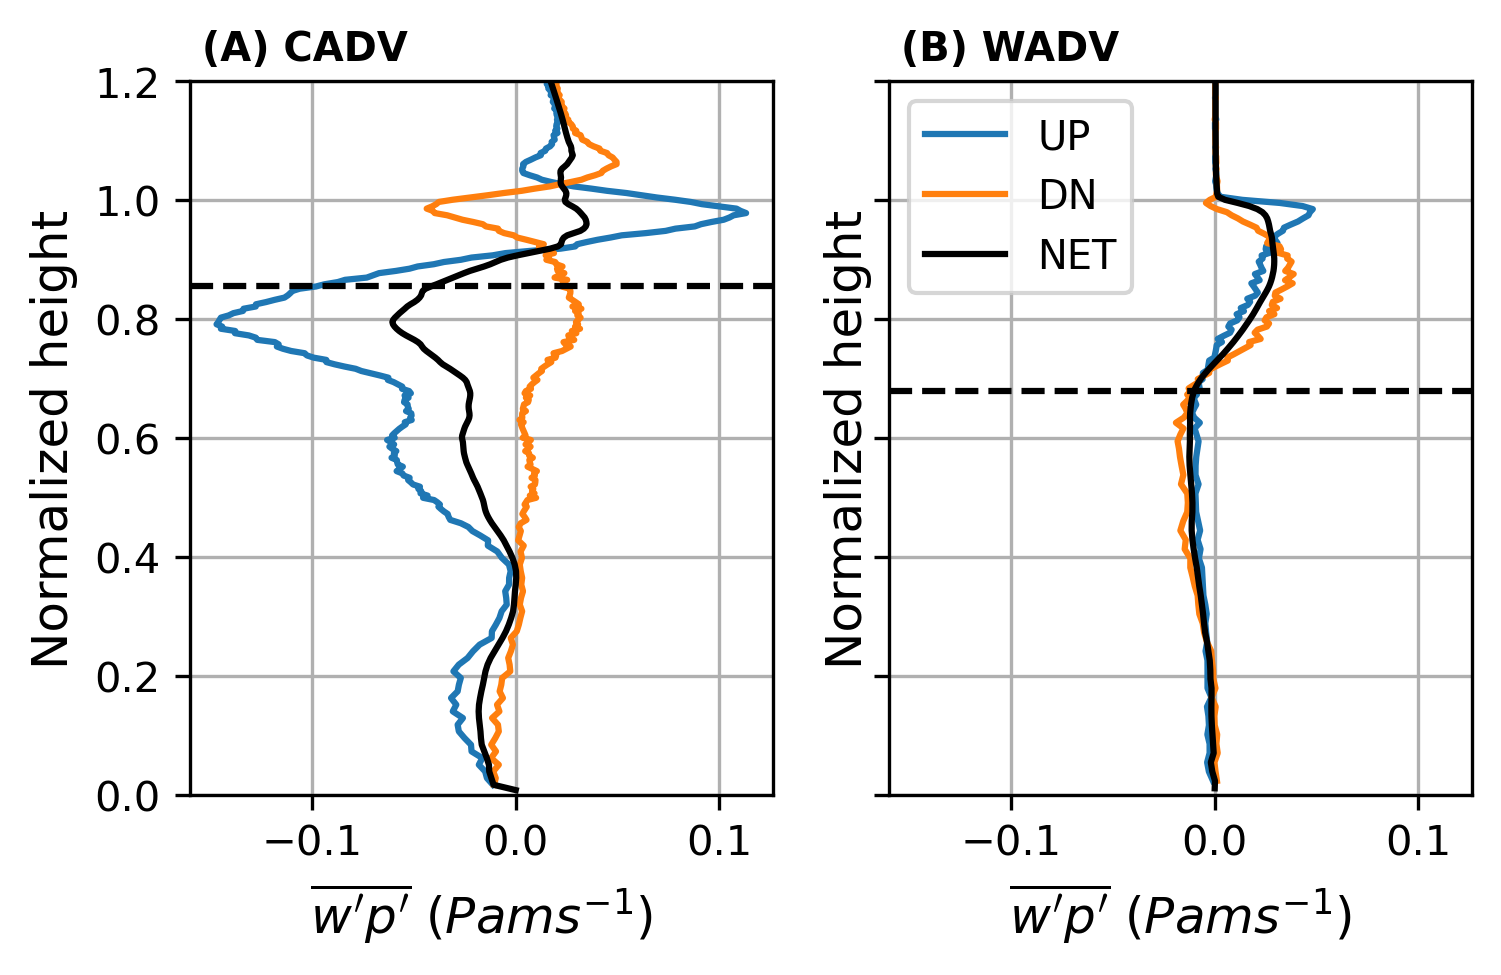

In [116]:
fig, axs = plt.subplots(ncols = 2,
                        nrows = 1,
                        sharex = True, sharey = True,
                        figsize=(14/2.54, (8)/2.54), dpi = 300)
#
axs[0].plot(wp_up, z, label = 'CADV UP')
axs[0].plot(wp_dn, z, label = 'CADV DN')
axs[0].plot(wp, z, label = 'CADV NET', color = 'black')

setax(axs[0], f["zcb"]/f["ZINV"]/1000.,
      xtitle = r'$\overline{w^{\prime}p^{\prime}} \ (Pa ms^{-1})$')

#
axs[1].plot(wp1_up, z1, label = 'UP')
axs[1].plot(wp1_dn, z1, label = 'DN')
axs[1].plot(wp1, z1, label = 'NET', color = 'black')

setax(axs[1], f1["zcb"]/f1["ZINV"]/1000.,
      xtitle = r'$\overline{w^{\prime}p^{\prime}} \ (Pa ms^{-1})$')

axs[1].legend(loc="best", fontsize=0.8*myfontsize)

for i, label in enumerate(('(A) CADV', '(B) WADV')):
    axs[i].text(0.02, 1.03, label, transform=axs[i].transAxes,fontsize=0.8*myfontsize, fontweight='bold')
    
fig.savefig('plot_result_wp_up_vs_dn_t=30h.png', dpi=fig.dpi, bbox_inches='tight')